# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hilma Amalia Wafda
- **Email:** wafdahilmaamalia@gmail.com
- **ID Dicoding:** hilma_amalia_wafda_RoNg

- Pertanyaan 1 : Bagaimana rata-rata kadar CO di seluruh stasiun pada tahun 2013 hingga 2017?
- Pertanyaan 2 : Bagaimana korelasi antara kadar SO2 dan NO2 dengan curah hujan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
from scipy import stats


## Data Wrangling

### Gathering Data

In [ ]:
aotizhongxin_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")

all_stations_df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df,
                          shunyi_df, tiantan_df, wanliu_df, changping_df, wanshouxigong_df], ignore_index=True)


### Assessing Data

In [ ]:
all_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455832 entries, 0 to 455831
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       455832 non-null  int64  
 1   year     455832 non-null  int64  
 2   month    455832 non-null  int64  
 3   day      455832 non-null  int64  
 4   hour     455832 non-null  int64  
 5   PM2.5    446319 non-null  float64
 6   PM10     448801 non-null  float64
 7   SO2      446183 non-null  float64
 8   NO2      443049 non-null  float64
 9   CO       433610 non-null  float64
 10  O3       441951 non-null  float64
 11  TEMP     455381 non-null  float64
 12  PRES     455389 non-null  float64
 13  DEWP     455376 non-null  float64
 14  RAIN     455391 non-null  float64
 15  wd       453870 non-null  object 
 16  WSPM     455471 non-null  float64
 17  station  455832 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 62.6+ MB


In [ ]:
all_stations_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,9513
PM10,7031
SO2,9649
NO2,12783
CO,22222


In [ ]:
all_stations_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,446319.000000,448801.000000,446183.000000,443049.000000,433610.000000,441951.000000,455381.000000,455389.00000,455376.000000,455391.00000,455471.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.125506,103.838549,15.763540,50.137322,1224.696587,57.416539,13.550288,1010.51734,2.415066,0.06416,1.739255
std,10122.116018,1.177198,3.448707,8.800102,6.922194,80.234955,91.197751,21.600469,34.767886,1156.053166,56.482412,11.430764,10.48539,13.798503,0.81597,1.251812
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.40000,-43.400000,0.00000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,2.000000,23.000000,500.000000,11.000000,3.100000,1002.00000,-9.000000,0.00000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.10000,3.000000,0.00000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,144.000000,19.000000,70.000000,1500.000000,82.000000,23.300000,1018.80000,15.000000,0.00000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.80000,29.100000,72.50000,13.200000


### Cleaning Data

Data dalam dataset ini merupakan data kontinu, sehingga salah satu cara untuk menangani missing value adalah dengan mean atua rata-rata.

In [ ]:
all_stations_df['CO'].fillna(all_stations_df['CO'].mean(), inplace=True)
all_stations_df['SO2'].fillna(all_stations_df['SO2'].mean(), inplace=True)
all_stations_df['NO2'].fillna(all_stations_df['NO2'].mean(), inplace=True)

<ipython-input-7-efd7f64c4bae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_stations_df['CO'].fillna(all_stations_df['CO'].mean(), inplace=True)
<ipython-input-7-efd7f64c4bae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
all_stations_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,9513
PM10,7031
SO2,0
NO2,0
CO,0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
all_stations_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,455832.000000,455832.000000,455832.000000,455832.000000,455832.000000,446319.000000,448801.000000,455832.000000,455832.000000,455832.000000,441951.000000,455381.000000,455389.00000,455376.000000,455391.00000,455471.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.125506,103.838549,15.763540,50.137322,1224.696587,57.416539,13.550288,1010.51734,2.415066,0.06416,1.739255
std,10122.116018,1.177198,3.448707,8.800102,6.922194,80.234955,91.197751,21.370627,34.276916,1127.521995,56.482412,11.430764,10.48539,13.798503,0.81597,1.251812
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.40000,-43.400000,0.00000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.00000,-9.000000,0.00000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,54.000000,81.000000,8.000000,44.000000,900.000000,45.000000,14.500000,1010.10000,3.000000,0.00000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,144.000000,19.000000,69.000000,1500.000000,82.000000,23.300000,1018.80000,15.000000,0.00000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.80000,29.100000,72.50000,13.200000


**Insight:**
- Setelah dilakukan penanganan missing value pada kolom CO, SO2 dan NO2 tidak terdapat perubahan pada nilai deskriptif statistik.
- Rata-rata kadar CO pada seluruh stasiun sebesar 1224.6965587
- Kadar terendah SO2 adalah 0.28

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana rata-rata kadar CO pada seluruh stasiun pada tahun 2013 hingga 2017?

In [ ]:
all_stations_df['yearly_avgCO'] = all_stations_df.groupby('year')['CO'].transform('mean')
# Menampilkan beberapa baris pertama dengan kolom 'year' terlihat
print(all_stations_df[['year', 'CO', 'yearly_avgCO']].head())

   year     CO  yearly_avgCO
0  2013  300.0   1195.111239
1  2013  300.0   1195.111239
2  2013  300.0   1195.111239
3  2013  300.0   1195.111239
4  2013  300.0   1195.111239


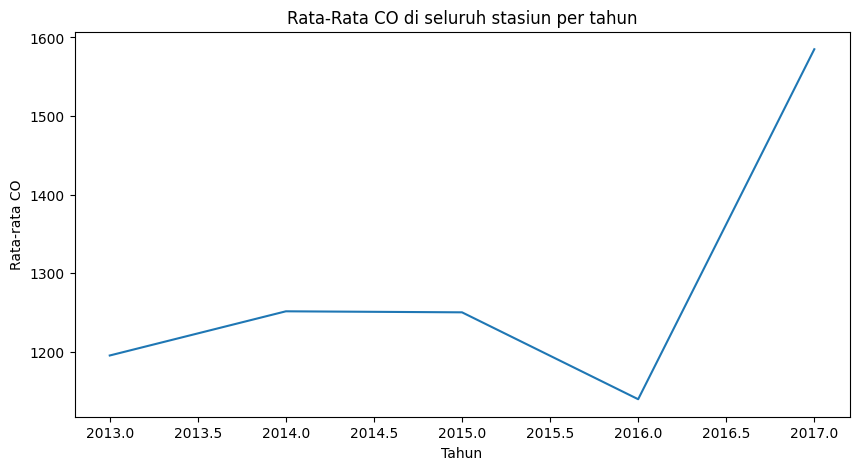

In [ ]:
plt.figure(figsize=(10,5))
all_stations_df.groupby('year')['CO'].mean().plot()
plt.title("Rata-Rata CO di seluruh stasiun per tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata CO")
plt.show()

### Pertanyaan 2:

Bagaimana korelasi antara kadar SO2 dan NO2 dengan curah hujan?

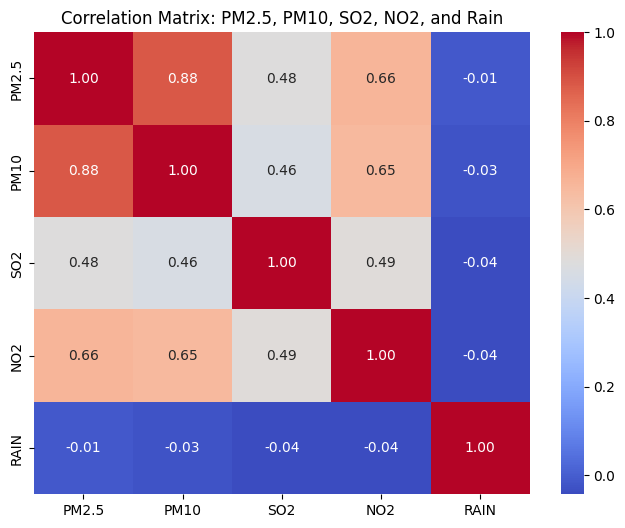

In [ ]:
correlation_matrix = all_stations_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'RAIN']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: PM2.5, PM10, SO2, NO2, and Rain')
plt.show()

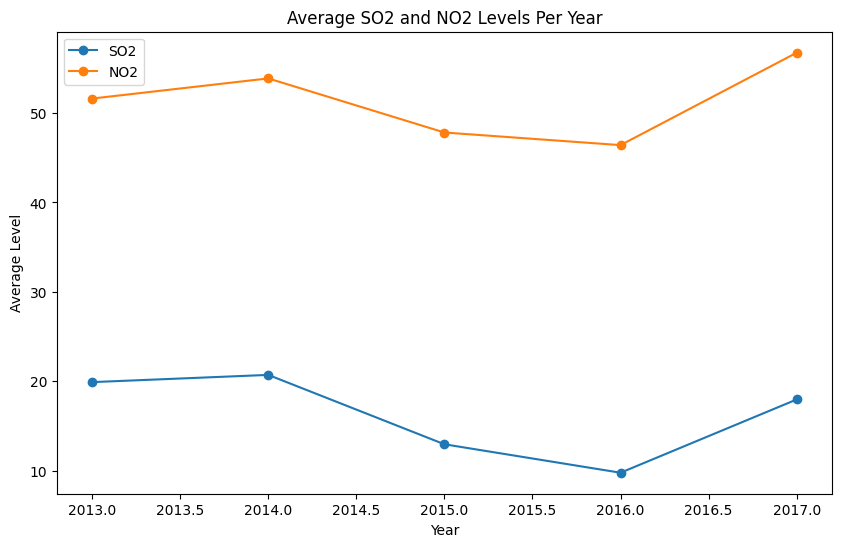

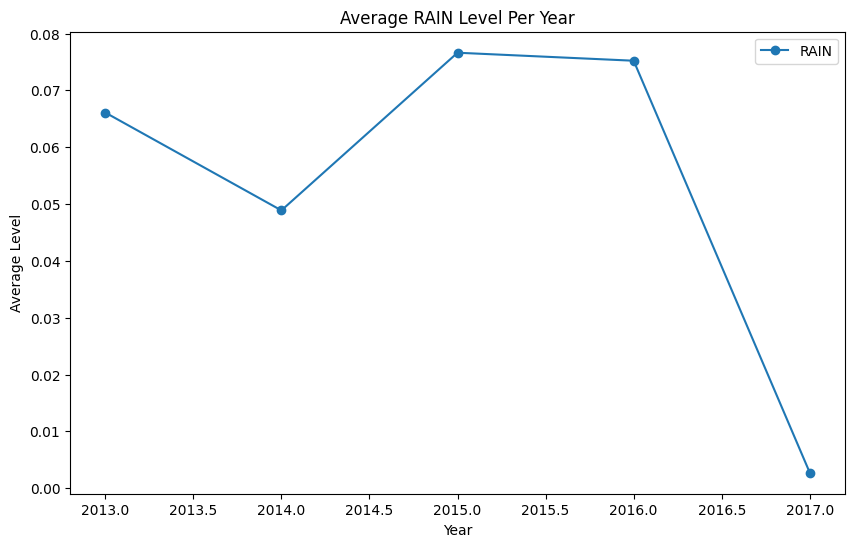

In [ ]:
yearly_avg = all_stations_df.groupby('year')[['SO2', 'NO2', 'RAIN']].mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(yearly_avg.index, yearly_avg['SO2'], label='SO2', marker='o')
ax.plot(yearly_avg.index, yearly_avg['NO2'], label='NO2', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Average Level')
ax.set_title('Average SO2 and NO2 Levels Per Year')
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(yearly_avg.index, yearly_avg['RAIN'], label='RAIN', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Average Level')
ax.set_title('Average RAIN Level Per Year')
ax.legend()

plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2